In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Import the Three datasets

In [2]:
df1 = pd.read_csv('movies.csv', sep='::', encoding="cp1252", header=None )
df2=pd.read_csv('ratings.csv', sep='::', encoding="cp1252", header=None)
df3=pd.read_csv('user.csv', sep = "::", encoding="cp1252", header=None)

C:\Users\Shivs\AppData\Local\Temp\ipykernel_6872\1799681542.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('movies.csv', sep='::', encoding="cp1252", header=None )
C:\Users\Shivs\AppData\Local\Temp\ipykernel_6872\1799681542.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv('ratings.csv', sep='::', encoding="cp1252", header=None)
C:\Users\Shivs\AppData\Local\Temp\ipykernel_6872\1799681542.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as

In [3]:
df1.rename(columns={0 : "movieid", 1 : "title", 2 : "genre"}, inplace=True)
df2.rename(columns={0 : "userid", 1 : "movieid", 2 : "rating", 3 : "timestamp"}, inplace=True)
df3.rename(columns={0 : "userid", 1 : "gender", 2 : "age", 3 : "occupation", 4 : "zipcode"}, inplace=True)

In [4]:
data=pd.merge(df2, df3, on="userid")
Master_Data = pd.merge(data, df1, on="movieid")

In [5]:
Master_Data.head()

,userid,movieid,rating,timestamp,gender,age,occupation,zipcode,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

C:\Users\Shivs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

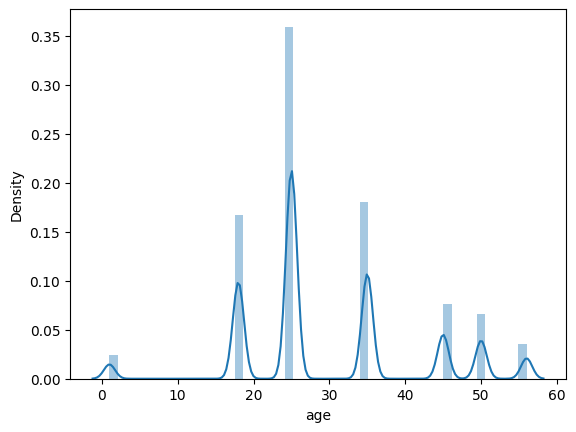

In [6]:
# 1. User Age Distribution
sns.distplot(Master_Data.age,)

#### Inference
as per the above graph, Age doesn't seem like normally distributed. the graph shows that there is only 7 peaks which means there is only 7 unique values in existed in Age Feature.
The majority of the users lies in between 20 - 30 age group.

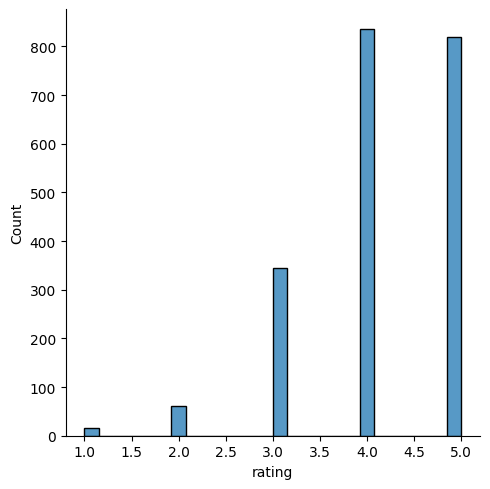

In [7]:
# User rating of the movie “Toy Story”
sns.displot(Master_Data.loc[Master_Data["title"]=="Toy Story (1995)"]["rating"])

#### Inference
According to the above graph the movie is quite good and most of the users give the positive feedback.
only few numbers of user gave the rating below 3.

In [8]:
# Top 25 movies by viewership rating
Master_Data.loc[Master_Data["rating"]==5]["title"].unique()[0:24]

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)',
       'Erin Brockovich (2000)', "Bug's Life, A (1998)",
       'Princess Bride, The (1987)', 'Ben-Hur (1959)',
       'Christmas Story, A (1983)',
       'Snow White and the Seven Dwarfs (1937)',
       'Wizard of Oz, The (1939)', 'Beauty and the Beast (1991)',
       'Gigi (1958)', 'Miracle on 34th Street (1947)',
       "Ferris Bueller's Day Off (1986)", 'Sound of Music, The (1965)',
       'Airplane! (1980)', 'Tarzan (1999)', 'Bambi (1942)',
       'Awakenings (1990)', 'Big (1988)', 'Pleasantville (1998)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Back to the Future (1985)', "Schindler's List (1993)"],
      dtype=object)

In [9]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Master_Data.loc[Master_Data["userid"]==2969][["title", "rating"]]

,title,rating
3615,Erin Brockovich (2000),5
5017,"Bug's Life, A (1998)",4
10670,Snow White and the Seven Dwarfs (1937),4
16394,"Sound of Music, The (1965)",4
24461,Back to the Future (1985),5
...,...,...
900277,"American Werewolf in Paris, An (1997)",4
913079,"Flintstones in Viva Rock Vegas, The (2000)",3
931436,Brokedown Palace (1999),4
966637,Open Your Eyes (Abre los ojos) (1997),4


## Feature Engineering:

In [10]:
genre = Master_Data["genre"].unique().tolist()

In [11]:
genre_list =[]
for i in genre:
    genre_list.append(i.split("|"))

In [12]:
Genre=[]
for sublist in genre_list:
    for genre in sublist:
        Genre.append(genre)

In [13]:
Unique_Genre = []
for genre in Genre:
    if genre not in Unique_Genre:
        Unique_Genre.append(genre)

In [14]:
print(f"There are Total {len(Unique_Genre)} Unique Genres.")

There are Total 18 Unique Genres.


### One hot encoding

##### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [15]:
one_hot = pd.get_dummies(Master_Data["genre"], drop_first=True)

In [16]:
one_hot

,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
one_hot.head()

,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Determine the features affecting the ratings of any particular movie.

C:\Users\Shivs\AppData\Local\Temp\ipykernel_6872\469292986.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Master_Data.corr(), annot=True)


<AxesSubplot: >

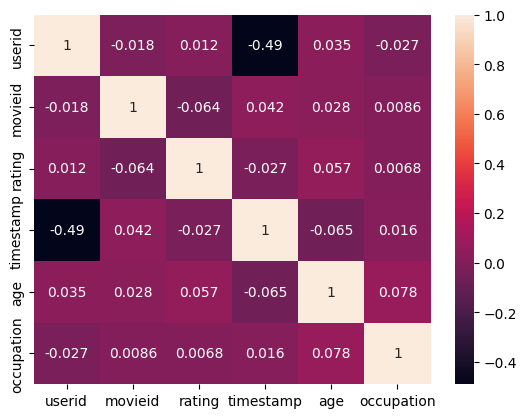

In [18]:
sns.heatmap(Master_Data.corr(), annot=True)

### Inference
1. According to the above heatmap Age Feature is affecting the Ratings More.
2. After Age feature, the Timestamp feature also plays a important role in affecting the Ratings (it is negatively correlated)
3. Occupation plays a very nominal amount of contribution in affecting Ratings.
4. MovieID, UserID and the Title having unique values so these are not contributing anything which is quite logical.